In [2]:
from get_train_test_for_modeling import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score
from format_train_test import *
import pickle
import sklearn.cross_validation as cv
from sklearn.ensemble import (GradientBoostingRegressor, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier,
                              RandomForestClassifier)
plt.style.use('ggplot')

%matplotlib inline

In [3]:
from get_prediction_data import *

In [5]:
get_prediction_data(46026)
prediction_df = clean_prediction_data('../data/data_for_prediction.csv')
prediction_df = adding_speed_col(prediction_df, 650)
prediction_df = add_time_delta(prediction_df)
prediction_df = add_time_y(prediction_df)
prediction_df = round_time_y(prediction_df)

In [164]:
prediction_df.columns

Index(['YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD',
       'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'PTDY', 'TIDE',
       'Date', 'TempDate', 't_arrive', 'time_delta', 'time_y', 'time_y_hr'],
      dtype='object')

## First gbr Model 

In [134]:
# making the training and testing data
filename = '../data/data_X_y_46059_train_w_tide.csv'
Xy_df = get_Xy_data(filename)

cols_to_keep = ['YY_x', 'MM_x', 'DD_x', 'hh_x', 'WD_x', 'WSPD_x',
                'GST_x', 'WVHT_x', 'DPD_x', 'APD_x', 'BAR_x', 'ATMP_x',
                'WTMP_x', 'DEWP_x', 'ID_x', 't_arrive','BAR_y','WVHT_y']

train_yrs = [1995, 1996, 1997, 1998, 1999, 2000, 2003, 2004, 2006, 2007]
test_yrs  = [2008]

X_train, X_test, y_train, y_test = get_train_test(Xy_df, cols_to_keep, train_yrs, test_yrs)

In [144]:
Xy_df[['id_x','t_arrive','time_y_hr','WVHT_y']]

,id_x,t_arrive,time_y_hr,WVHT_y
0,1995-01-01 00:00:00,15.018653,1995-01-01 15:00:00,2.700
1,1995-01-01 01:00:00,15.018653,1995-01-01 16:00:00,2.700
2,1995-01-01 02:00:00,14.826106,1995-01-01 16:00:00,2.700
3,1995-01-01 03:00:00,14.638434,1995-01-01 17:00:00,2.700
4,1995-01-01 04:00:00,14.276991,1995-01-01 18:00:00,2.700
5,1995-01-01 05:00:00,14.102882,1995-01-01 19:00:00,3.000
6,1995-01-01 06:00:00,14.455454,1995-01-01 20:00:00,2.700
7,1995-01-01 07:00:00,14.455454,1995-01-01 21:00:00,3.000
8,1995-01-01 08:00:00,13.446934,1995-01-01 21:00:00,3.000
9,1995-01-01 09:00:00,12.708091,1995-01-01 21:00:00,3.000


In [139]:
Xy_df.tail(2)

,Unnamed: 0,id_x,YY_x,MM_x,DD_x,hh_x,WD_x,WSPD_x,GST_x,WVHT_x,...,MWD_y,BAR_y,ATMP_y,WTMP_y,DEWP_y,VIS_y,ID_y,id_test,WaterLevel,id
114584,114584,2008-12-31 22:00:00,2008.0,12.0,31.0,22.0,241.0,3.5,4.2,1.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-01-01 13:00:00,1.348,2009-01-01 13:00:00
114585,114585,2008-12-31 23:00:00,2008.0,12.0,31.0,23.0,232.0,4.5,5.6,2.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-01-01 13:00:00,1.348,2009-01-01 13:00:00


In [23]:
# fitting a gradient booster model
n_estimators = 100000
params = {'n_estimators': n_estimators, 'max_depth': 3, 'min_samples_split': 4,
          'learning_rate': 0.01, 'loss': 'ls'}
gbr = ensemble.GradientBoostingRegressor(**params)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=4, min_weight_fraction_leaf=0.0,
             n_estimators=100000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [52]:
with open('gbr_1.pkl', 'wb') as f:
   # Write the model to a file.
   pickle.dump(gbr, f)

In [55]:
with open('gbr_1.pkl', 'rb') as f:
       gbr_1 = pickle.load(f)

In [57]:
gbr_1.predict(X_test)
mse_train = mean_squared_error(y_train, gbr_1.predict(X_train))

In [58]:
mse_train

0.050013804815076238

In [25]:
y_hat = gbr.predict(X_test)
mse_train = mean_squared_error(y_train, gbr.predict(X_train))
mse_test  = mean_squared_error(y_test, y_hat)
                              
r2  = r2_score(y_test, y_hat)
                              
print("MSE_train: %.4f" % mse_train)
print("MSE_test: %.4f"  % mse_test)
print("R2: %.4f" % r2)

MSE_train: 0.0500
MSE_test: 0.2905
R2: 0.6027


In [1]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(y_test[0::2],':', color='b', label = 'Test Data')
ax.plot(y_hat[0::2], ':', label = 'Model Prediction')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Wave Height (m)', fontsize=14)
#ax.set_title('Test Data Comparison with Model Predictions for Source 46005')
plt.legend(prop={'size': 14})

NameError: name 'plt' is not defined

## Second gbr Model 

In [14]:
# making the training and testing data
filename = '../data/data_X_y_46059_train_w_tide.csv'
Xy_df = get_Xy_data(filename)

cols_to_keep = ['YY_x', 'MM_x', 'DD_x', 'hh_x', 'WD_x', 'WSPD_x',
                'GST_x', 'WVHT_x', 'DPD_x', 'APD_x','MWD_x', 'BAR_x', 'ATMP_x',
                'WTMP_x', 'DEWP_x', 'ID_x', 't_arrive','WVHT_y']

train_yrs = [1995, 1996, 1997, 1998, 1999, 2000, 2003, 2004, 2006, 2007]
test_yrs  = [2008]

X_train, X_test, y_train, y_test = get_train_test(Xy_df, cols_to_keep, train_yrs, test_yrs)

In [13]:
Xy_df.columns

Index(['Unnamed: 0', 'id_x', 'YY_x', 'MM_x', 'DD_x', 'hh_x', 'WD_x', 'WSPD_x',
       'GST_x', 'WVHT_x', 'DPD_x', 'APD_x', 'MWD_x', 'BAR_x', 'ATMP_x',
       'WTMP_x', 'DEWP_x', 'VIS_x', 'ID_x', 't_arrive', 'time_delta', 'time_y',
       'time_y_hr', 'id_y', 'YY_y', 'MM_y', 'DD_y', 'hh_y', 'WD_y', 'WSPD_y',
       'GST_y', 'WVHT_y', 'DPD_y', 'APD_y', 'MWD_y', 'BAR_y', 'ATMP_y',
       'WTMP_y', 'DEWP_y', 'VIS_y', 'ID_y', 'id_test', 'WaterLevel', 'id'],
      dtype='object')

In [60]:
# fitting a gradient booster model
n_estimators = 60000
params = {'n_estimators': n_estimators, 'max_depth': 3, 'min_samples_split': 4,
          'learning_rate': 0.01, 'loss': 'ls'}
gbr_2 = ensemble.GradientBoostingRegressor(**params)
gbr_2.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=4, min_weight_fraction_leaf=0.0,
             n_estimators=60000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [7]:
with open('gbr_2.pkl', 'wb') as f:
   # Write the model to a file.
   pickle.dump(gbr_2, f)

NameError: name 'gbr_2' is not defined

In [10]:
with open('gbr_hr.pkl', 'rb') as f:
    gbr_2 = pickle.load(f)

In [15]:
y_hat_2 = gbr_2.predict(X_test)
mse_train_2 = mean_squared_error(y_train, gbr_2.predict(X_train))
mse_test_2  = mean_squared_error(y_test, y_hat_2)
                              
r2  = r2_score(y_test, y_hat_2)
                              
print("MSE_train: %.4f" % mse_train_2)
print("MSE_test: %.4f"  % mse_test_2)
print("R2: %.4f" % r2)

MSE_train: 0.0721
MSE_test: 0.3288
R2: 0.5503


In [23]:
df_plot = Xy_df[Xy_df['YY_x'] == 2008]

In [30]:
df_plot.index = pd.to_datetime(df_plot['id'])

In [33]:
df_plot['yhat'] = y_hat_2
df_plot['y_test'] = y_test

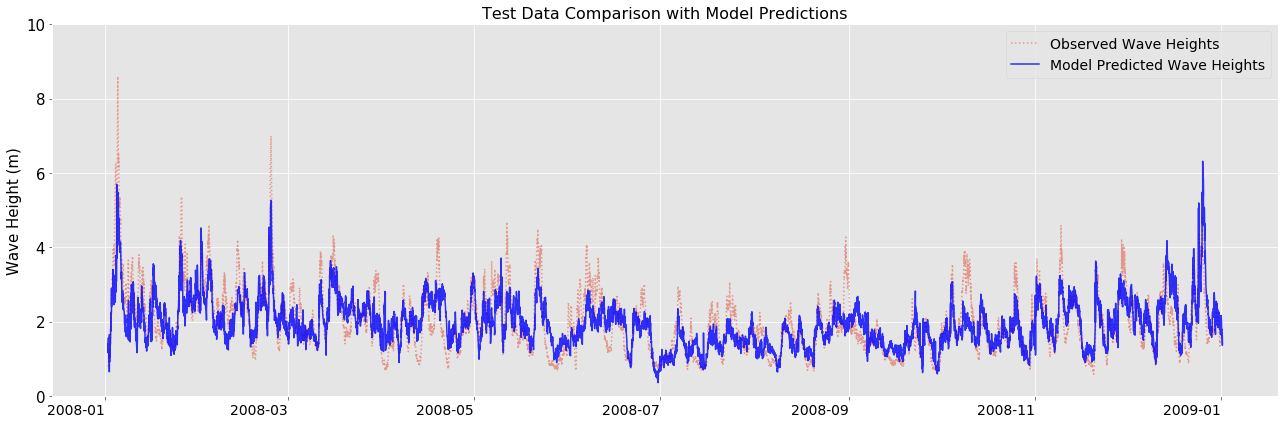

In [78]:
fig, ax = plt.subplots(figsize=(18,6))
df_plot['y_test'].plot(linestyle=':', 
                             alpha=0.5,
                             label='Observed Wave Heights')
df_plot['yhat'].plot(alpha=0.8,linestyle ='-', color='b',label = 'Model Predicted Wave Heights')
ax.set_xlabel('', fontsize=15, color='k')
ax.set_ylabel('Wave Height (m)', fontsize=15, color='k')
ax.set_title('Test Data Comparison with Model Predictions', color='k', fontsize=16)
ax.set_ylim(0,10)
plt.xticks(rotation=0, color='k',fontsize=14)
plt.yticks(rotation=0, color='k', fontsize=15)
plt.legend(prop={'size': 14})
plt.tight_layout()
plt.savefig('Train_test_fitting_Example.png')

In [22]:
len(y_test)

8790

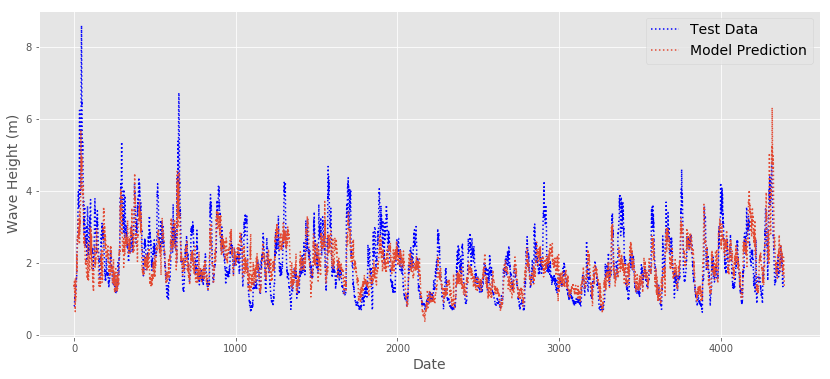

In [16]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(y_test[0::2],':', color='b', label = 'Test Data')
ax.plot(y_hat_2[0::2], ':', label = 'Model Prediction')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Wave Height (m)', fontsize=14)
#ax.set_title('Test Data Comparison with Model Predictions for Source 46005')
plt.legend(prop={'size': 14})

In [68]:
from get_train_test_for_modeling import *
filename = '../data/data_X_y_46059_train_w_tide.csv'
Xy_df = get_Xy_data(filename)

cols_to_keep = ['YY_x', 'MM_x', 'DD_x', 'hh_x', 'WD_x', 'WSPD_x',
                'GST_x', 'WVHT_x', 'DPD_x', 'APD_x', 'BAR_x', 'ATMP_x',
                'WTMP_x', 'DEWP_x', 'ID_x', 't_arrive','WVHT_y']

allyrs = [1995, 1996, 1997, 1998, 1999, 2000, 2003, 2004, 2006, 2007, 2008]

def make_cv_data_sets(dataframe, cols_to_keep, allyrs):
    X_train_sets = []
    y_train_sets = []
    X_test_sets  = []
    y_test_sets  = []
    for year in allyrs:
        test_yr = [year]
        train_yr =[yr for yr in allyrs if yr != year]
        X_train, X_test, y_train, y_test = get_train_test(Xy_df, cols_to_keep, train_yr, test_yr)
        X_train_sets.append(X_train)
        y_train_sets.append(y_train)
        X_test_sets.append(X_test)
        y_test_sets.append(y_test)
    return X_train_sets, y_train_sets, X_test_sets, y_test_sets

In [ ]:
def grid_fit(x_train, y_train, x_test, y_test, param_grid):
    
        models = [GradientBoostingRegressor(n_estimators=10000, 
                                            max_depth = td, 
                                            min_samples_split: 4, 
                                            learning_rate: 0.0001, 
                                            loss: 'ls') for td in param_grid.values()[0]]
    
        processes = [mp.Process(target = model.fit, args=(x_train,y_train)) for model in models]
        
        for p in processes:
            p.start
        for p in processes:
            p.join
            
        N_ESTIMATORS = 1000
        N_FOLDS = 10

        tree_depths = [1, 3, 5]
        N_TREE_DEPTHS = len(tree_depths)

        test_scores = np.zeros((N_FOLDS, N_TREE_DEPTHS, N_ESTIMATORS))
        train_scores = np.zeros((N_FOLDS, N_TREE_DEPTHS, N_ESTIMATORS))
        #rmse_train = [mean_squared_error(y_train, model.predict(x_train)) ** 0.5 for model in models]
        #rmse_test  = [mean_squared_error(y_test, model.predict(x_test)) ** 0.5 for model in models]
        for i, model in enumerate(models):
            
            for j, y_pred in enumerate(zip(model.staged_predict(X_train), model.staged_predict(X_test)):
                
                train_scores[k, i, j] = model.loss_(y_train, y_pred[0])
                test_scores[k, i, j] = model.loss_(y_test, y_pred[1])
                                       
                print('fitting and predicting for tree depth {}, Train: {}, Test: {}'.format(tree_depths[i]), 
                                                                                             model.loss_(y_train, 
                                                                                                         y_pred[0]),
                                                                                             model.loss_(y_test, 
                                                                                                         y_pred[1])), 
        return train_scores, test_scores

In [147]:
param_grid = {'tree_depth':[3,5,7]}

processes = [mp.Process(target = grid_fit, args=(x_train, y_train, x_test, y_test, param_grid)) for x, y in zip(X_train_sets, y_train_sets, X_test_sets, y_test_sets)]

NameError: name 'mp' is not defined

In [ ]:
for p in processes:
    p.start()

In [148]:
for p in processes:
    p.join()

NameError: name 'processes' is not defined

In [115]:
X_train_sets, y_train_sets, X_test_sets, y_test_sets = make_cv_data_sets(Xy_df, cols_to_keep, allyrs)

In [145]:
# Varying the tree depth rate
N_ESTIMATORS = 1000
N_FOLDS = 10

tree_depths = [1, 3, 5]
N_TREE_DEPTHS = len(tree_depths)

test_scores = np.zeros((N_FOLDS, N_TREE_DEPTHS, N_ESTIMATORS))

X_train, y_train = X_train_sets[0], y_train_sets[0]
X_test, y_test = X_test_sets[0], y_test_sets[0]

test_scores = np.zeros((N_FOLDS, N_TREE_DEPTHS, N_ESTIMATORS))

models_cv = [GradientBoostingRegressor(n_estimators=N_ESTIMATORS,
                                    max_depth=td, learning_rate=0.0005, subsample=0.5) for td in tree_depths]
for model in models_cv:
    model.fit(X_train, y_train)

for i, model in enumerate(models_cv):
    print('fitting and predicting for tree depth {}'.format(tree_depths[i]))
    for j, y_pred in enumerate(model.staged_predict(X_test)):
        test_scores[k, i, j] = model.loss_(y_test, y_pred)

fitting and predicting for tree depth 1


KeyboardInterrupt: 

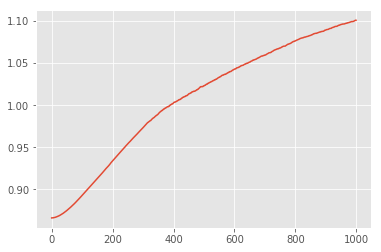

In [133]:
plt.plot(test_scores[0][0])

In [ ]:
#*************************************************************************************************************#

In [75]:
# Varying the tree depth rate
N_ESTIMATORS = 6000
N_FOLDS = 10

tree_depths = [1, 3, 5, 7, 9]
N_TREE_DEPTHS = len(tree_depths)

test_scores = np.zeros((N_FOLDS, N_TREE_DEPTHS, N_ESTIMATORS))

for k in range(len(X_train_sets)):
    X_train, y_train = X_train_sets[k], y_train_sets[k]
    X_test, y_test = X_test_sets[k], y_test_sets[k]

    models = [GradientBoostingRegressor(n_estimators=N_ESTIMATORS,
                                        max_depth=td, learning_rate=0.01, subsample=0.5,
                                        random_state=154)
              for td in tree_depths]
    for model in models:
        model.fit(X_train, y_train)
        
    for i, model in enumerate(models):
        print('fitting and predicting for fold {} and tree depth {}'.format(k, tree_depths[i]))
        for j, y_pred in enumerate(model.staged_predict(X_test)):
            test_scores[k, i, j] = model.loss_(y_test, y_pred)
        
mean_test_scores = np.mean(test_scores, axis=0)

fitting and predicting for fold 0 and tree depth 1
fitting and predicting for fold 0 and tree depth 3
fitting and predicting for fold 0 and tree depth 5
fitting and predicting for fold 0 and tree depth 7


KeyboardInterrupt: 

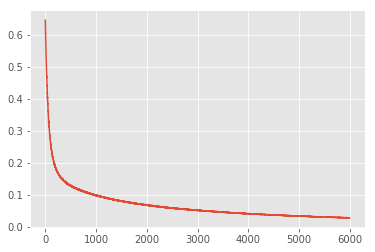

In [107]:
plt.plot(model.train_score_)

In [128]:
test_scores

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0., 

In [104]:
len(test_scores[0][0])

6000

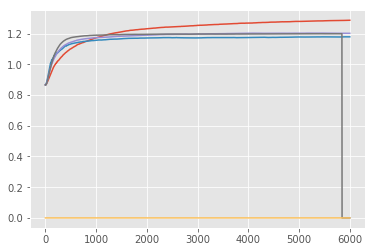

In [91]:
pplt.plot(test_scores[0][0])
plt.plot(test_scores[0][1])
plt.plot(test_scores[0][2])
plt.plot(test_scores[0][3])
plt.plot(test_scores[0][4])

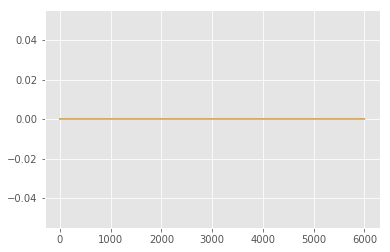

In [92]:
plt.plot(test_scores[1][0])
plt.plot(test_scores[1][1])
plt.plot(test_scores[1][2])
plt.plot(test_scores[1][3])
plt.plot(test_scores[1][4])

In [ ]:
for i, depth in enumerate(tree_depths):        
    plt.plot(np.arange(N_ESTIMATORS) + 1, mean_test_scores[i, :], 
                 color=plt.cm.copper(float(i) / 10 + 0.5),
                 label="Tree Depth " + str(depth))
plt.legend(loc="upper right")
plt.title("Effect of Varying the Tree Depth on Cross Validation Error")
plt.xlabel('Number of Boosting Stages', fontsize=14)
plt.ylabel('Average Squared Error', fontsize=14)

plt.ylim([0, 40])
plt.savefig('plots/varying-tree-depth-error.png', bbox_inches='tight')

In [ ]:
X_train, X_test, y_train, y_test = cv.train_test_split(X, y, test_size=0.25, random_state=1)

## pickling the model

with open(‘XC.pkl’, ‘wb’) as f:
   # Write the model to a file.
   pickle.dump(gbr, f)

with open(‘/home/ubuntu/soaring_predictor/XC.pkl’, ‘rb’) as f:
       XC = pickle.load(f)

In [ ]:
 s3.put_object(Bucket=malnor.bucket, Body=the file you're putting, Key=path including filename 

In [166]:
X_train, X_test, y_train, y_test = get_train_test(filename, cols_to_keep, train_yrs, test_yrs)

In [167]:
params = {'n_estimators': 2000, 'max_depth': 3, 'min_samples_split': 4,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse_train = mean_squared_error(y_train, clf.predict(X_train))
mse_test = mean_squared_error(y_test, clf.predict(X_test))
r2  = r2_score(y_test, clf.predict(X_test))
print("MSE_train: %.4f" % mse_train)
print("MSE_test: %.4f"  % mse_test)
print("R2: %.4f" % r2)

MSE_train: 0.1970
MSE_test: 0.3118
R2: 0.5736


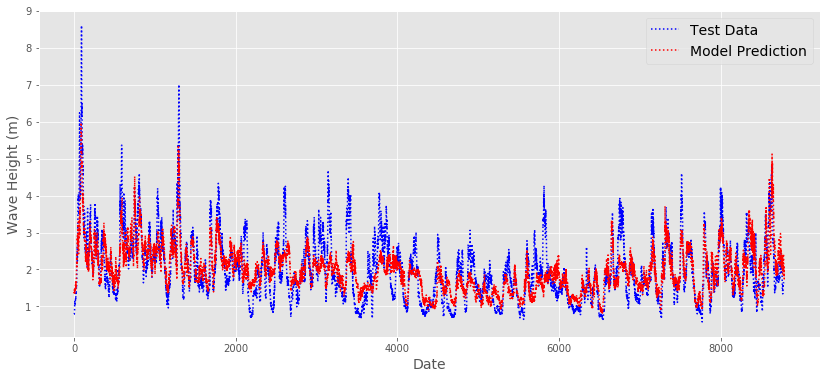

In [168]:
yhat = clf.predict(X_test)
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(y_test,':', color='b', label = 'Test Data')
ax.plot(yhat,':', color='r', label = 'Model Prediction')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Wave Height (m)', fontsize=14)
#ax.set_title('Test Data Comparison with Model Predictions for Source 46005')
plt.legend(prop={'size': 14})

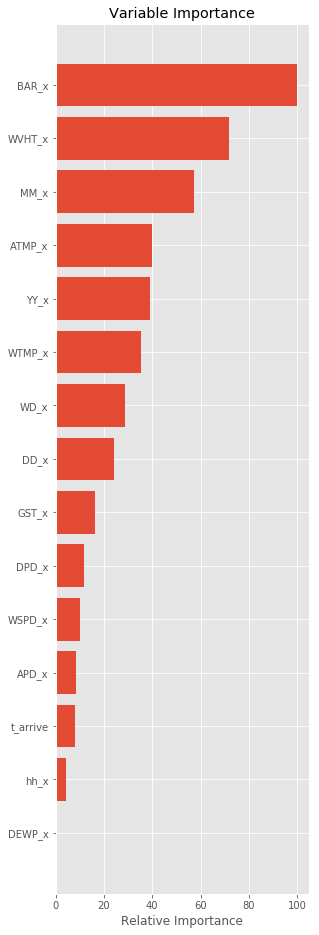

In [171]:
# Plot feature importance
fig, ax = plt.subplots(figsize=(10,16))
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(cols_to_keep)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [172]:
get_prediction_data()
prediction_df = clean_prediction_data('../data/data_for_prediction.csv')
prediction_df = adding_speed_col(prediction_df, 650)
prediction_df = add_time_delta(prediction_df)
prediction_df = add_time_y(prediction_df)
prediction_df = round_time_y(prediction_df)

cols_to_keep = ['YY', 'MM', 'DD', 'hh', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD',
                'APD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 't_arrive']

X_real_time_predictions = prediction_df[cols_to_keep].values

In [174]:
yhat_realtime = clf.predict(X_real_time_predictions)

In [187]:
forecast = pd.DataFrame(yhat_realtime)

In [188]:
forecast.index = prediction_df['time_y_hr']

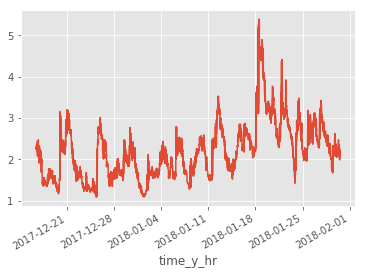

In [192]:
forecast[0].plot()

In [194]:
from get_prediction_data import*
get_prediction_data()
prediction_df = clean_prediction_data('../data/data_for_prediction.csv')
prediction_df = adding_speed_col(prediction_df, 650)
prediction_df = add_time_delta(prediction_df)
prediction_df = add_time_y(prediction_df)
prediction_df = round_time_y(prediction_df)

In [196]:
prediction_df.index = prediction_df['time_y_hr']

In [197]:
prediction_df.head()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,...,DEWP,VIS,PTDY,TIDE,Date,TempDate,t_arrive,time_delta,time_y,time_y_hr
time_y_hr,,,,,,,,,,,,,,,,,,,,,
2018-01-30 12:00:00,2018,1,29,22,50,350.0,2.0,2.0,1.3,9,...,NaN,NaN,-0.4,NaN,2018-01-30 06:00:00,2018-01-29 22:00:00-08:00,14.276991,14:16:37.169047,2018-01-30 12:16:37.169047,2018-01-30 12:00:00
2018-01-30 12:00:00,2018,1,29,21,50,300.0,3.0,4.0,1.1,9,...,NaN,NaN,-0.0,NaN,2018-01-30 05:00:00,2018-01-29 21:00:00-08:00,15.841593,15:50:29.735518,2018-01-30 12:50:29.735518,2018-01-30 12:00:00
2018-01-30 12:00:00,2018,1,29,20,50,70.0,2.0,3.0,1.2,10,...,NaN,NaN,-0.4,NaN,2018-01-30 04:00:00,2018-01-29 20:00:00-08:00,16.061615,16:03:41.815178,2018-01-30 12:03:41.815178,2018-01-30 12:00:00
2018-01-30 11:00:00,2018,1,29,19,50,360.0,2.0,2.0,1.3,10,...,NaN,NaN,0.0,NaN,2018-01-30 03:00:00,2018-01-29 19:00:00-08:00,16.759946,16:45:35.807142,2018-01-30 11:45:35.807142,2018-01-30 11:00:00
2018-01-30 10:00:00,2018,1,29,18,50,340.0,3.0,5.0,1.3,10,...,NaN,NaN,1.2,NaN,2018-01-30 02:00:00,2018-01-29 18:00:00-08:00,16.759946,16:45:35.807142,2018-01-30 10:45:35.807142,2018-01-30 10:00:00


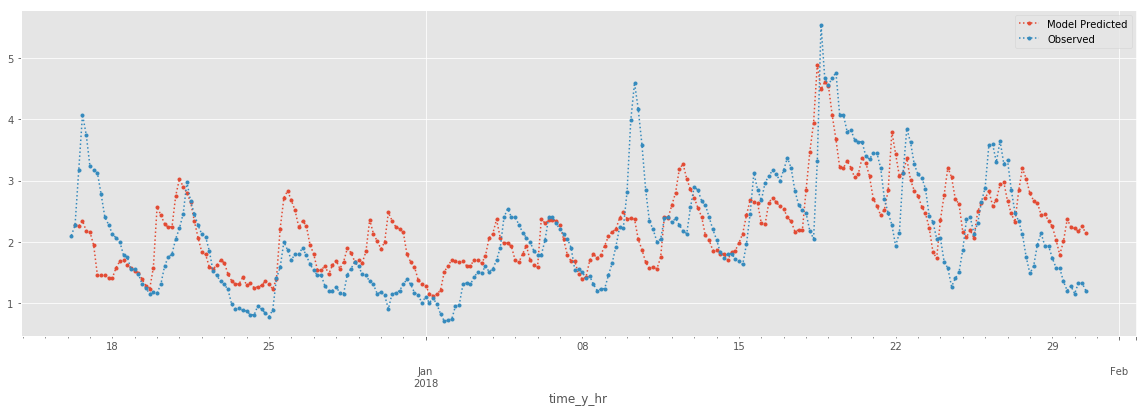

In [210]:
fig, ax = plt.subplots(figsize =(20,6))
forecast[0].resample('4H').mean().plot(marker = '.', linestyle=':', label='Model Predicted')
prediction_df['WVHT'].resample('4H').mean().plot(marker='.', linestyle=':', label='Observed')
plt.legend()